# Delete Garuda logo from Official Document of Thailand

This call "Template Matching Approaching"
Ref : https://docs.opencv.org/trunk/d4/dc6/tutorial_py_template_matching.html

Example on stackoverflow : https://stackoverflow.com/questions/56132149/how-to-remove-specific-tag-sticker-object-from-images-using-opencv?noredirect=1&lq=1 

==============================================Code Begin Here===================================================

In [1]:
import cv2
import numpy as np

from io import BytesIO
import PIL
import PIL.Image
from PIL import Image
import IPython
import IPython.display
from IPython.display import clear_output

In [2]:
# USE This method instaed of cv2.imageShow
def showarray(a, fmt='jpeg'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [3]:
# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

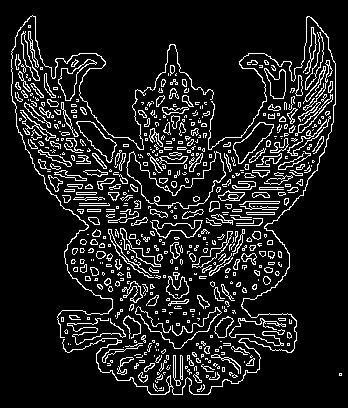

In [4]:
# Load template, convert to grayscale, perform canny edge detection
template = cv2.imread('/Users/Noppadol/Desktop/python/AI Agent/img/Official_Doc_template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
#cv2.imshow("template", template)
showarray(template)

# Load original image, convert to grayscale
original_image = cv2.imread('/Users/Noppadol/Desktop/python/AI Agent/img/Document_img/Official_Doc2.jpg')
final = original_image.copy()
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
found = None

In [5]:
# Dynamically rescale image for better template matching
for scale in np.linspace(0.2, 1.0, 20)[::-1]:

    # Resize image to scale and keep track of ratio
    resized = maintain_aspect_ratio_resize(gray, width=int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # Stop if template image size is larger than resized image
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # Detect edges in resized image and apply template matching
    canny = cv2.Canny(resized, 50, 200)
    detected = cv2.matchTemplate(canny, template, cv2.TM_CCOEFF)
    (_, max_val, _, max_loc) = cv2.minMaxLoc(detected)

    # Uncomment this section for visualization
    '''
    clone = np.dstack([canny, canny, canny])
    cv2.rectangle(clone, (max_loc[0], max_loc[1]), (max_loc[0] + tW, max_loc[1] + tH), (0,255,0), 2)
    cv2.imshow('visualize', clone)
    cv2.waitKey(0)
    '''

    # Keep track of correlation value
    # Higher correlation means better match
    if found is None or max_val > found[0]:
        found = (max_val, max_loc, r)

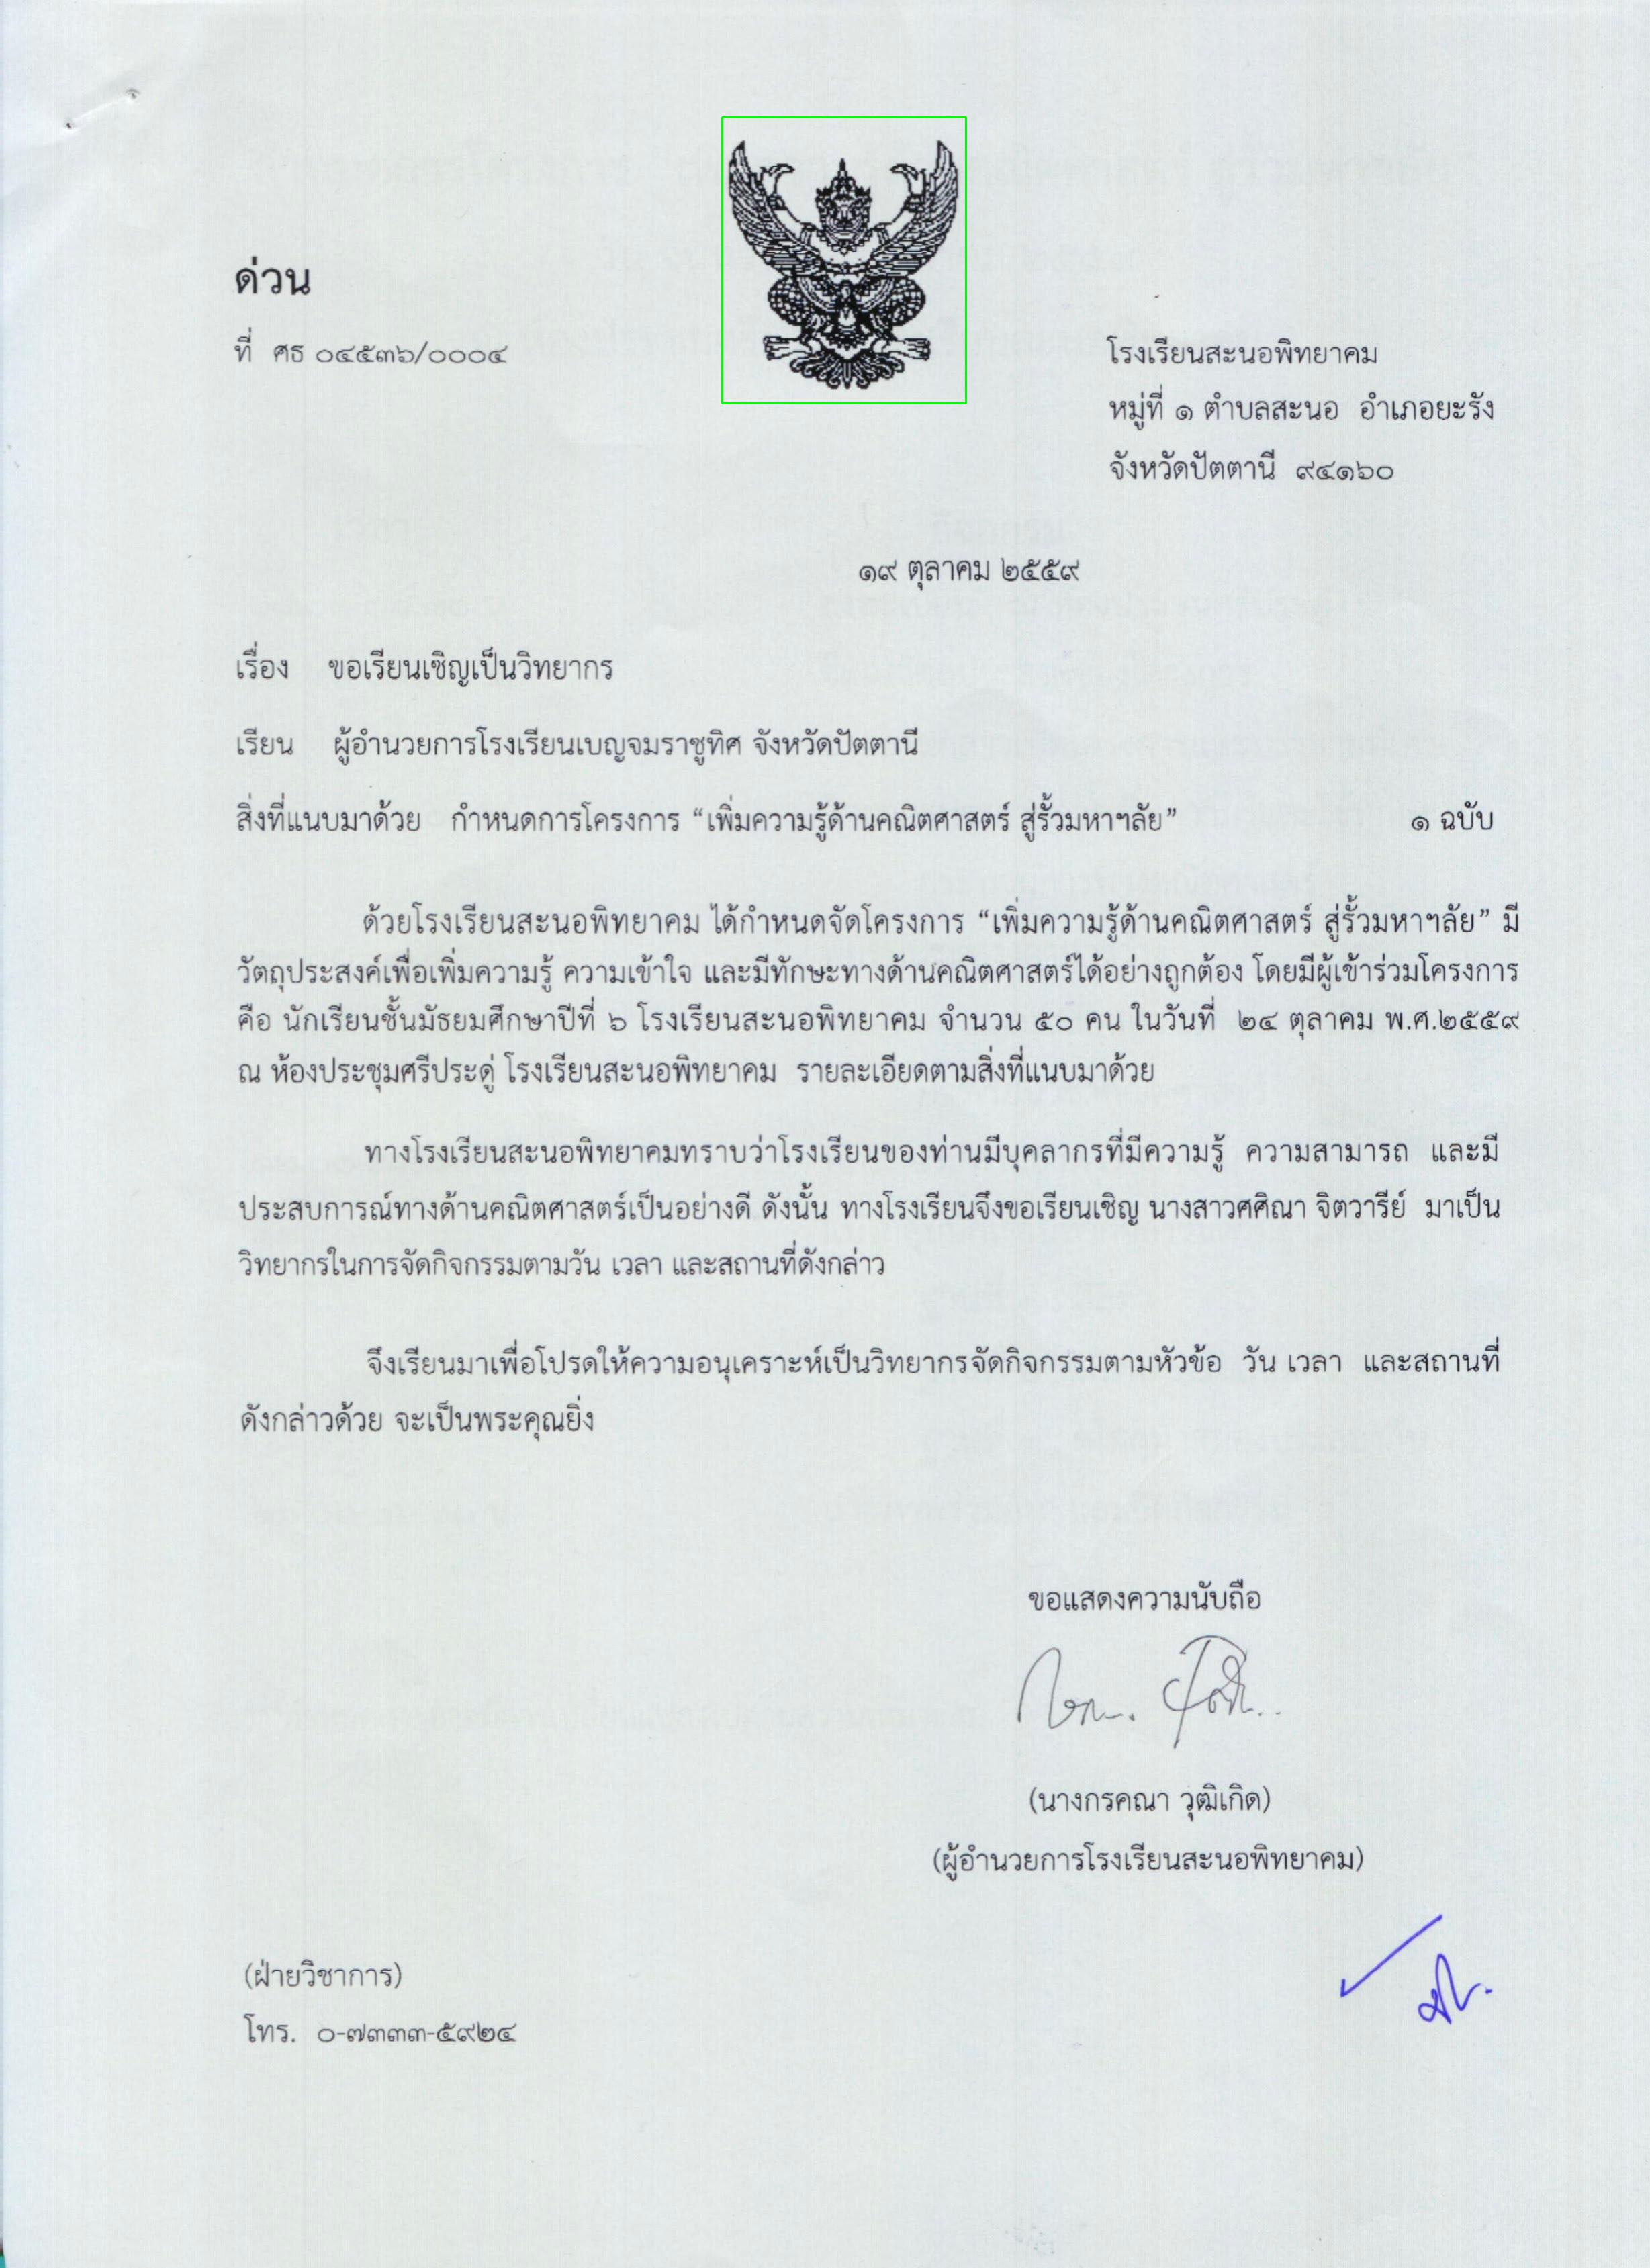

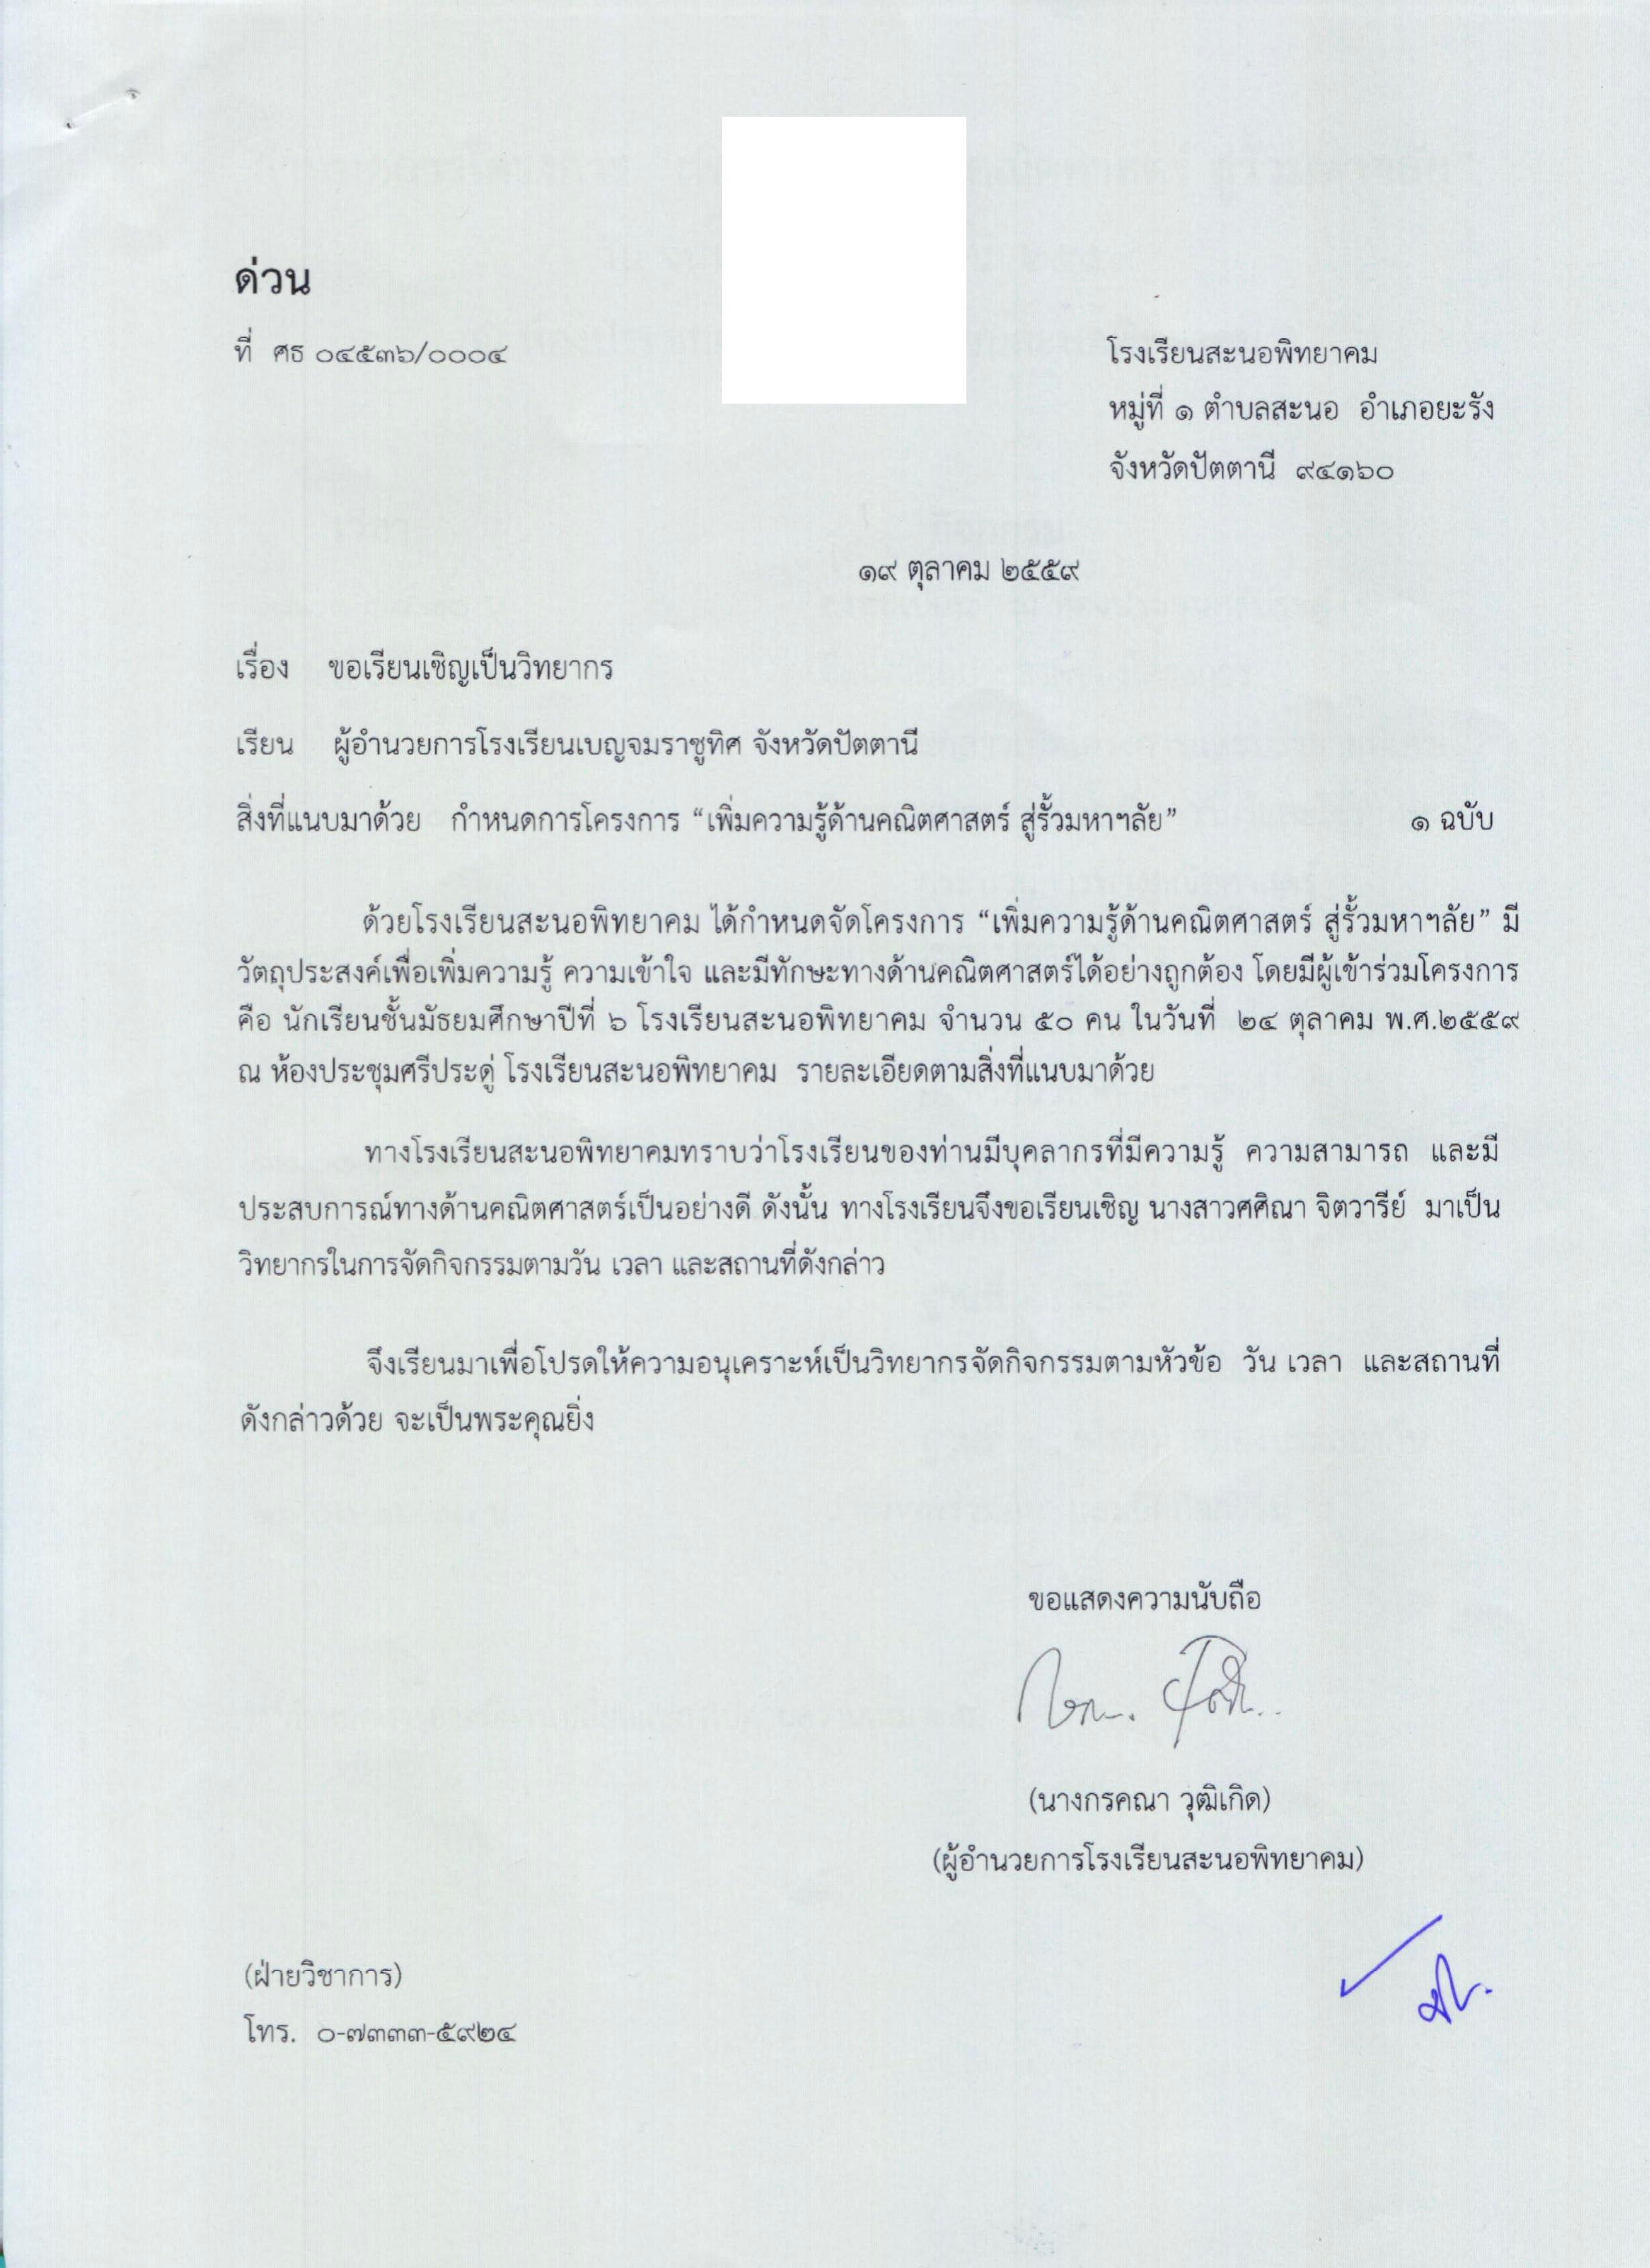

In [6]:
# Compute coordinates of bounding box
(_, max_loc, r) = found
(start_x, start_y) = (int(max_loc[0] * r), int(max_loc[1] * r))
(end_x, end_y) = (int((max_loc[0] + tW) * r), int((max_loc[1] + tH) * r))

# Draw bounding box on ROI to remove
cv2.rectangle(original_image, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
#cv2.imshow('detected', original_image)
showarray(original_image)

# Erase unwanted ROI (Fill ROI with white)
cv2.rectangle(final, (start_x, start_y), (end_x, end_y), (255,255,255), -1)
#cv2.imshow('final', final)
#cv2.waitKey(0)
showarray(final)

In [11]:
#Save img
im = Image.fromarray(final)
im.save('/Users/Noppadol/Desktop/python/AI Agent/img/output_doc_img/no_garuda_doc.jpg', 'JPEG')

==============================================END of Program======================================================

In [ ]:
type(final)

In [ ]:
img.save('/Users/Noppadol/Desktop/python/AI Agent/img/output_doc_img/no_garuda_doc.jpg', 'JPEG')

In [ ]:
import numpy as np
import imutils
from io import BytesIO
import PIL
import PIL.Image
import IPython
import IPython.display
from IPython.display import clear_output
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [ ]:
# USE This method instaed of cv2.imageShow
def showarray(a, fmt='jpeg'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [ ]:
img_path = '/Users/Noppadol/Desktop/python/AI Agent/Official_Doc2.jpg'
image = cv2.imread(img_path)

showarray(image)

In [ ]:
g_path = '/Users/Noppadol/Desktop/python/AI Agent/garuda.png'
garuda = cv2.imread(g_path, 0)

#Find garuda contour
contours,hierarchy = cv2.findContours(garuda, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(garuda.shape)
internal_contours = np.zeros(garuda.shape)
for index, el in enumerate(contours):
    if hierarchy[0][index][3] == -1:
        cv2.drawContours(external_contours, contours, index, 255, -1)
    else:
        cv2.drawContours(internal_contours, contours, index, 255, -1)

In [ ]:
#Show garuda contour
plt.subplot(121)
plt.imshow(internal_contours, cmap='gray')
plt.title('internal contours')

plt.subplot(122)
plt.imshow(external_contours, cmap='gray')
plt.title('external contours')
    
plt.show()

In [ ]:
mask = internal_contours

dst_TELEA = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(image,mask,3,cv2.INPAINT_NS)

In [ ]:
garuda_doc = cv2.imread(img_path, 0)

#Find garuda contour
contours,hierarchy = cv2.findContours(garuda_doc, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(garuda_doc.shape)
internal_contours = np.zeros(garuda_doc.shape)
for index, el in enumerate(contours):
    if hierarchy[0][index][3] == -1:
        cv2.drawContours(external_contours, contours, index, 255, -1)
    else:
        cv2.drawContours(internal_contours, contours, index, 255, -1)

In [ ]:
#Show garuda contour
plt.subplot(121)
plt.imshow(internal_contours, cmap='gray')
plt.title('internal contours')

plt.subplot(122)
plt.imshow(external_contours, cmap='gray')
plt.title('external contours')
    
plt.show()

In [ ]:
plt.imshow(internal_contours, cmap='gray')
plt.title('internal contours')
plt.show()

In [ ]:
type(internal_contours)

In [ ]:
img_gauss = cv2.GaussianBlur(image, ksize=(17,17), sigmaX=10)
showarray(img_gauss)

Template matching